In [13]:
import openbabel
import pandas as pd
import math
import numpy as np

df = pd.DataFrame()

def convert_to_moles(affinity_type, affinity_value):
    scale = 0
    if affinity_type == "mM":
        scale = 1e-4
    if affinity_type == "uM":
        scale = 1e-6
    if affinity_type == "nM":
        scale = 1e-9
    if affinity_type == "pM":
        scale = 1e-12
    if affinity_type == "fM":
        scale = 1e-15
        
    return np.float128(affinity_value*scale)

def convert_moles_to_kcalmol(moles):
    return -1.987*1e-3*300*math.log(moles)
        

f = open("CASF-2016/power_scoring/CoreSet.dat")
for line in f.readlines()[1:]:
       
        split = line.split()
        name = split[0]
        raw_data = split[4]
        data_type = raw_data.split("=")[0]
        affinity_data = raw_data.split("=")[1]
        affinity_type = affinity_data.lstrip('0123456789.')
        affinity_value = float(affinity_data[0:-2])
        affinity_moles = convert_to_moles(affinity_type, affinity_value)
        kcalmol = convert_moles_to_kcalmol(affinity_moles)

        gauss1 = None
        gauss2 = None
        repulsion = None
        hydrophobic = None
        hydrogen = None
        AD_kcal = None
        
        tmp = open("CASF-2016/coreset/{}/test.txt".format(name))
        for tmp_line in tmp.readlines():
            if tmp_line.__contains__("gauss 1"):
                gauss1 = float(tmp_line.split(":")[-1].strip())
            if tmp_line.__contains__("gauss 2"):
                    gauss2 = float(tmp_line.split(":")[-1].strip())
            if tmp_line.__contains__("repulsion"):
                    repulsion = float(tmp_line.split(":")[-1].strip()) 
            if tmp_line.__contains__("hydrophobic"):
                    hydrophobic = float(tmp_line.split(":")[-1].strip()) 
            if tmp_line.__contains__("Hydrogen"):
                    hydrogen = float(tmp_line.split(":")[-1].strip()) 
            if tmp_line.__contains__("Affinity:"):
                    AD_kcal = float(tmp_line.split(":")[-1].split()[0].strip())
                    

        
        data = pd.DataFrame({"name": [name], "data_type": [data_type], 
                             "affinity_type": [affinity_type],
                             "affinity_value": [affinity_value],
                            "affinity_moles": [affinity_moles],
                             "kcal": [-kcalmol], "gauss1": [gauss1],
                            "gauss2": [gauss2], "repulsion": [repulsion],
                             "hydrophobic": [hydrophobic], "hydrogen": [hydrogen],
                            "AD_kcal": [AD_kcal], "series": ["core-2016"]
                            })
        
        df = df.append(data)
        
        
f = open("index/INDEX_refined_data.2018")
for line in f.readlines():
    if line.__contains__("//"):
        
        split = line.split()
        name = split[0]
        raw_data = split[4]
        data_type = raw_data.split("=")[0]
        affinity_data = raw_data.split("=")[1]
        affinity_type = affinity_data.lstrip('0123456789.')
        affinity_value = float(affinity_data[0:-2])
        affinity_moles = convert_to_moles(affinity_type, affinity_value)
        kcalmol = convert_moles_to_kcalmol(affinity_moles)

        gauss1 = None
        gauss2 = None
        repulsion = None
        hydrophobic = None
        hydrogen = None
        AD_kcal = None
        
        tmp = open("set/{}/test.txt".format(name))
        for tmp_line in tmp.readlines():
            if tmp_line.__contains__("gauss 1"):
                gauss1 = float(tmp_line.split(":")[-1].strip())
            if tmp_line.__contains__("gauss 2"):
                    gauss2 = float(tmp_line.split(":")[-1].strip())
            if tmp_line.__contains__("repulsion"):
                    repulsion = float(tmp_line.split(":")[-1].strip()) 
            if tmp_line.__contains__("hydrophobic"):
                    hydrophobic = float(tmp_line.split(":")[-1].strip()) 
            if tmp_line.__contains__("Hydrogen"):
                    hydrogen = float(tmp_line.split(":")[-1].strip()) 
            if tmp_line.__contains__("Affinity:"):
                    AD_kcal = float(tmp_line.split(":")[-1].split()[0].strip())
                    

        
        data = pd.DataFrame({"name": [name], "data_type": [data_type], 
                             "affinity_type": [affinity_type],
                             "affinity_value": [affinity_value],
                            "affinity_moles": [affinity_moles],
                             "kcal": [-kcalmol], "gauss1": [gauss1],
                            "gauss2": [gauss2], "repulsion": [repulsion],
                             "hydrophobic": [hydrophobic], "hydrogen": [hydrogen],
                            "AD_kcal": [AD_kcal], "series": ["refined-2018"]
                            })
        
        df = df.append(data)

df

,AD_kcal,affinity_moles,affinity_type,affinity_value,data_type,gauss1,gauss2,hydrogen,hydrophobic,kcal,name,repulsion,series
0,-5.02214,1.300000e-03,uM,1300.0000,Ki,40.8312,517.243,1.47228,20.1716,-3.961318,4llx,0.62131,core-2016
0,-5.73501,2.200000e-06,uM,2.2000,Ki,55.4698,664.157,0.42946,38.2373,-7.765426,5c28,0.89685,core-2016
0,-7.91396,1.100000e-08,nM,11.0000,Ki,62.2894,1038.45,1.38427,38.0581,-10.923753,3uuo,1.04448,core-2016
0,-7.94233,1.000000e-09,nM,1.0000,Ki,79.7331,1168.09,1.26203,51.857,-12.353139,3ui7,2.48645,core-2016
0,-9.61648,8.200000e-12,pM,8.2000,Ki,135.321,1718.69,1.17303,59.2161,-15.216577,5c2h,2.77261,core-2016
0,-6.73016,2.200000e-05,mM,0.2200,Kd,70.3785,903.84,3.37573,40.3691,-6.392855,2v00,2.92393,core-2016
0,-9.00398,1.500000e-06,uM,1.5000,Ki,112.479,1574.98,3.04891,59.8769,-7.993728,3wz8,2.70357,core-2016
0,-10.9117,4.800000e-08,nM,48.0000,Ki,132.358,2282.57,6.905,87.9905,-10.045516,3pww,4.87645,core-2016
0,-8.64278,1.500000e-08,nM,15.0000,Ki,135.269,2331.76,6.27667,62.5859,-10.738870,3prs,5.62886,core-2016
0,-7.14199,1.000000e-09,nM,1.0000,Ki,130.282,2532.13,5.25053,44.9425,-12.353139,3uri,3.94283,core-2016


In [5]:
df.to_csv("data.csv")

In [15]:

import openbabel
import pandas as pd
import math
import numpy as np


df = pd.read_csv("data.csv")




In [16]:
from sklearn import linear_model

In [38]:

df = df.dropna()


df = df.loc[df['series'] == "core-2016"]
print(df)
X = df[["gauss1", "gauss2", "repulsion",  
       "hydrophobic", "hydrogen"]]

y = df["kcal"] 


from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)  

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression(fit_intercept=False)  
model = regressor.fit(X_train, y_train)  

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

#X = coeff_df[['gauss1','gauss2','repulsion','hydrophobic']].values
print(regressor.coef_)
# print(coeff_df.__dict__)
print("--weight_gauss1 {} --weight_gauss2 {} --weight_repulsion {} --weight_hydrophobic {} --weight_hydrogen {}".format(*regressor.coef_))

     Unnamed: 0   AD_kcal  affinity_moles affinity_type  affinity_value  \
0             0  -5.02214    1.300000e-03            uM       1300.0000   
1             0  -5.73501    2.200000e-06            uM          2.2000   
2             0  -7.91396    1.100000e-08            nM         11.0000   
3             0  -7.94233    1.000000e-09            nM          1.0000   
4             0  -9.61648    8.200000e-12            pM          8.2000   
5             0  -6.73016    2.200000e-05            mM          0.2200   
6             0  -9.00398    1.500000e-06            uM          1.5000   
7             0 -10.91173    4.800000e-08            nM         48.0000   
8             0  -8.64278    1.500000e-08            nM         15.0000   
9             0  -7.14199    1.000000e-09            nM          1.0000   
10            0 -10.60176    6.400000e-06            uM          6.4000   
11            0  -7.24773    3.500000e-07            uM          0.3500   
12            0  -8.30300

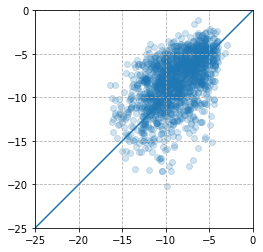

In [113]:
y_pred = regressor.predict(X_test)  
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
predicted_vs_actual

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = predicted_vs_actual["Actual"]
y = predicted_vs_actual["Predicted"]

ax.scatter(x, y, alpha=0.2)
ax.plot(range(-25, 2), range(-25, 2))
ax.set_xlim((-25, 0))
ax.set_ylim((-25, 0))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')

In [108]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print "\n"
print 'Score:', model.score(X_test, y_test)

('Mean Absolute Error:', 2.2832942822777653)
('Mean Squared Error:', 8.43379248518351)
('Root Mean Squared Error:', 2.904099255394607)


Score: -0.21692661223193266


In [109]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

y = df["kcal"] 
X = df[["gauss1", "gauss2", "repulsion",  
       "hydrophobic", "hydrogen"]]
# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=2)
print 'Cross-validated scores:', scores

Cross-validated scores: [-3.76383924 -4.82822636]


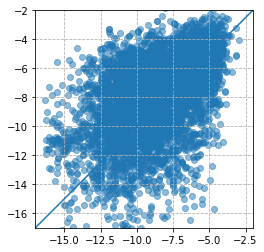

In [110]:
predictions = cross_val_predict(model, X, y, cv=5)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = y
y = predictions

ax.scatter(x, y, alpha=0.5)
ax.plot(range(-17, 2), range(-17, 2))
ax.set_xlim((-17, -2))
ax.set_ylim((-17, -2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')

In [125]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit import DataStructs

In [155]:
# bivalirudin_fp = AllChem.GetMACCSKeysFingerprint(drugbank[0])
# fps = [AllChem.GetMACCSKeysFingerprint(mol) for mol in approved]
# sims = DataStructs.BulkTanimotoSimilarity(bivalirudin_fp, fps)
# sims[:10]
import os
import rdkit

GAG_fps = []
path = "/home/eric/Projects/GlycoTorch/data/ligands/smarts/"
for x in os.listdir(path):
    if x.__contains__(".smi"):
        f = open(path+x)
        smi = f.readlines()[0].split()[0]
        m = Chem.MolFromSmiles(smi)
        
        if not m == None:
            GAG_fps.append(AllChem.GetMACCSKeysFingerprint(m))
        
        
PDBbind_fps = {}
PDBbind_mols = {}
path = "/home/eric/Projects/refined-set/set/"
for x in os.listdir(path):
    m = rdkit.Chem.rdmolfiles.MolFromMol2File(path+x+"/"+x+"_ligand.mol2")
    if not m == None:
        PDBbind_mols[x] = m
        PDBbind_fps[x] = AllChem.GetMACCSKeysFingerprint(m)
    




In [179]:
simillar = set()
name_similarity = {}

for GAG_fp in GAG_fps:
    for key, value in PDBbind_fps.items():
        
        sims = DataStructs.TanimotoSimilarity(GAG_fp, value)
        if sims > 0.7:
            simillar.add(key)
            name_similarity[key] = sims
            
print(simillar)
print(len(simillar))
        
        
        

set(['4r59', '1m7d', '3t83', '3t82', '3t85', '3t84', '1f8c', '1f8b', '1f8e', '1f8d', '4pft', '2vjx', '3nsn', '2euk', '3o4k', '1ocq', '1ec3', '1m7i', '1od8', '5l9i', '5i2e', '2oxn', '4r5a', '2cbj', '1gai', '4r5b', '1d4h', '2qwb', '2qwc', '1j01', '2qwd', '2qwe', '4zx0', '4zx1', '1eby', '4ufj', '5duw', '1ugx', '3old', '4ad3', '3tay', '3suu', '3sut', '2vk6', '4css', '2wm0', '1jak', '3s6t', '4zwx', '3zq9', '2qpu', '3hkn', '4mnp', '1k1y', '3jzj', '3hkt', '4cpz', '3hkq', '2b1g', '5b2d', '4d4d', '4b9z', '4x5p', '4ad2', '3coz', '1ax0', '3nw3', '5lne', '2cex', '4az6', '5lyr', '4v27', '4ocq', '2yhw', '3vtr', '1ppi', '4uac', '3m3c', '4hp0', '3n35', '2r0h', '2vmc', '4azb', '4l6t', '5f8y', '5xg5', '4azi', '5lom', '4gzw', '4mmp', '3w37', '1ogg', '1f73', '4gzx', '2wly', '5jop', '2evl', '4hpi', '4zwz', '2hl4', '2wlz', '2ya6', '2ya7', '3b50', '2xg9', '2xm1', '2xm2', '2x6x', '3t1m', '4k0o', '3jyr', '1wcq', '3k02', '1xd0', '4lkk', '1uz8', '1uz4', '5uff', '1uz1', '2p3i', '5ufc', '1kjr', '2bvd', '1ur9', '1e

In [190]:
from rdkit.Chem import Draw
for x in simillar:
    m = PDBbind_mols[x]
    Draw.MolToFile(m,'images/{}.png'.format(x),  wedgeBonds=True)
    
    


In [170]:
only_simillar = pd.DataFrame()

for x in simillar:
    tmp_only_simillar = df[df["name"] == x]
    only_simillar = only_simillar.append(tmp_only_simillar)
print(only_simillar)


    AD_kcal  affinity_moles affinity_type  affinity_value data_type   gauss1  \
0  -5.04918    1.100000e-08            nM          11.000        Ki  48.1142   
0  -7.64093    5.900000e-07            uM           0.590        Kd  83.0561   
0   -5.8536    1.050000e-07            nM         105.000        Ki  103.311   
0  -5.55893    1.010000e-07            nM         101.000        Ki  74.6002   
0  -5.56522    1.130000e-08            nM          11.300        Ki  72.2978   
0  -5.45288    1.060000e-07            nM         106.000        Ki  79.1832   
0  -5.56523    4.000000e-08            uM           0.040        Ki  73.6597   
0  -5.40875    4.000000e-06            uM           4.000        Ki  72.4603   
0   -5.7436    1.500000e-05            uM          15.000        Ki  73.5265   
0  -5.77243    4.000000e-04            uM         400.000        Ki  76.0967   
0  -9.30825    2.300000e-09            nM           2.300        Kd  125.745   
0  -6.61779    1.100000e-05            u

In [206]:

only_simillar = only_simillar.dropna()

X = only_simillar[["gauss1", "gauss2", "repulsion",  
       "hydrophobic", "hydrogen"]]

y = only_simillar["kcal"] 


from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression(fit_intercept=False)  
model = regressor.fit(X_train, y_train)  

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df) 
print
print(regressor.intercept_)

             Coefficient
gauss1         -0.074174
gauss2          0.000099
repulsion       0.019584
hydrophobic     0.001897
hydrogen       -0.150136

0.0


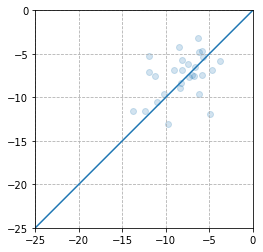

In [207]:
y_pred = regressor.predict(X_test)  
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
predicted_vs_actual

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = predicted_vs_actual["Actual"]
y = predicted_vs_actual["Predicted"]

ax.scatter(x, y, alpha=0.2)
ax.plot(range(-25, 2), range(-25, 2))
ax.set_xlim((-25, 0))
ax.set_ylim((-25, 0))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')

In [212]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print "\n"
print 'Score:', model.score(X_test, y_test)

X = only_simillar[["gauss1", "gauss2", "repulsion",  
       "hydrophobic", "hydrogen"]]

y = only_simillar["kcal"] 

# print 'Score:', model.score(regressor.predict(X), y)

 ('Mean Absolute Error:', 2.0835359544101033)
('Mean Squared Error:', 7.696685023520941)
('Root Mean Squared Error:', 2.7742900035001643)


Score: -0.1975671651212418


In [ ]:
predictions = cross_val_predict(model, X, y, cv=5)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = y
y = predictions

ax.scatter(x, y, alpha=0.5)
ax.plot(range(-17, 2), range(-17, 2))
ax.set_xlim((-17, -2))
ax.set_ylim((-17, -2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')

In [202]:
s = ""
for x in simillar:
    s += " "+x
    
print(s)

 4r59 1m7d 3t83 3t82 3t85 3t84 1f8c 1f8b 1f8e 1f8d 4pft 2vjx 3nsn 2euk 3o4k 1ocq 1ec3 1m7i 1od8 5l9i 5i2e 2oxn 4r5a 2cbj 1gai 4r5b 1d4h 2qwb 2qwc 1j01 2qwd 2qwe 4zx0 4zx1 1eby 4ufj 5duw 1ugx 3old 4ad3 3tay 3suu 3sut 2vk6 4css 2wm0 1jak 3s6t 4zwx 3zq9 2qpu 3hkn 4mnp 1k1y 3jzj 3hkt 4cpz 3hkq 2b1g 5b2d 4d4d 4b9z 4x5p 4ad2 3coz 1ax0 3nw3 5lne 2cex 4az6 5lyr 4v27 4ocq 2yhw 3vtr 1ppi 4uac 3m3c 4hp0 3n35 2r0h 2vmc 4azb 4l6t 5f8y 5xg5 4azi 5lom 4gzw 4mmp 3w37 1ogg 1f73 4gzx 2wly 5jop 2evl 4hpi 4zwz 2hl4 2wlz 2ya6 2ya7 3b50 2xg9 2xm1 2xm2 2x6x 3t1m 4k0o 3jyr 1wcq 3k02 1xd0 4lkk 1uz8 1uz4 5uff 1uz1 2p3i 5ufc 1kjr 2bvd 1ur9 1ebz 4azg 3zdv 2sim 2jiw 2zq0 2vw1 3ckz 3gsm 2vvs 4cd4 3ozp 1f4x


In [198]:
for x in simillar:
    print(r"\includegraphics[width=3cm]{{images/{}.png}}".format(x))

\includegraphics[width=3cm]{images/4r59.png}
\includegraphics[width=3cm]{images/1m7d.png}
\includegraphics[width=3cm]{images/3t83.png}
\includegraphics[width=3cm]{images/3t82.png}
\includegraphics[width=3cm]{images/3t85.png}
\includegraphics[width=3cm]{images/3t84.png}
\includegraphics[width=3cm]{images/1f8c.png}
\includegraphics[width=3cm]{images/1f8b.png}
\includegraphics[width=3cm]{images/1f8e.png}
\includegraphics[width=3cm]{images/1f8d.png}
\includegraphics[width=3cm]{images/4pft.png}
\includegraphics[width=3cm]{images/2vjx.png}
\includegraphics[width=3cm]{images/3nsn.png}
\includegraphics[width=3cm]{images/2euk.png}
\includegraphics[width=3cm]{images/3o4k.png}
\includegraphics[width=3cm]{images/1ocq.png}
\includegraphics[width=3cm]{images/1ec3.png}
\includegraphics[width=3cm]{images/1m7i.png}
\includegraphics[width=3cm]{images/1od8.png}
\includegraphics[width=3cm]{images/5l9i.png}
\includegraphics[width=3cm]{images/5i2e.png}
\includegraphics[width=3cm]{images/2oxn.png}
\includegr